### Importing the gdelt dataframe with embeddings already calculated

----------------------------------------------------------------------------

In [2]:
#Importing the necessary libraries for the EDA
import pandas as pd #Data processing
import pickle #Deserialize embeddings
import numpy as np #Linear algebra
import re #Match and manipulate text strings
from collections import Counter #To count the number of articles per 
import re #Data cleaning
from bs4 import BeautifulSoup #For removing html tags in articles

In [3]:
# Specify the path to the pickled DataFrame file
pickle_file_path = r'C:\Users\ghuiskens\Thesis\News analysis\News sentiment\gdelt_datainput_sentiment_calculation.pkl'

# Load the serialized DataFrame from the pickle file
with open(pickle_file_path, 'rb') as f:
    loaded_serialized_df = f.read()

# Deserialize the pickled DataFrame
gdelt_df = pickle.loads(loaded_serialized_df)

# Now you can use the loaded_df with the original structure
gdelt_df.head()

,published,text,title,url,producer_in_article,paragraphs,embeddings_paragraphs
0,2022-03-15 05:45:00,[These ancient creatures can squeeze through t...,Progressive Charlestown,http://www.progressive-charlestown.com/search?...,[copar],[These ancient creatures can squeeze through t...,"[[-0.01725187, 0.046331406, 0.07239527, -0.001..."
4,2023-07-15 04:15:00,[The Netherlands is known for plenty of (unhea...,A brief history of Dutch chocolate,https://www.iamexpat.nl/lifestyle/lifestyle-ne...,"[droste, hosta, tony's chocolonely]",[The Netherlands is known for plenty of unheal...,"[[0.075105086, -0.025926448, 0.03910257, 0.066..."
5,2023-02-15 03:15:00,"[Try as we might, it’s impossible to escape th...",Made in Holland Is Amazon Latest Culinary Des...,https://news.yahoo.com/made-holland-amazon-lat...,[droste],[Try as we might its impossible to escape the ...,"[[0.038175445, -0.017276494, 0.0025077933, -0...."
6,2023-02-15 15:30:00,"[“I have three reasons to love, love, love thi...","A Valentine cake , made with a mother love - W...",https://westfaironline.com/exclusives/a-valent...,[],[I have three reasons to love love love this c...,"[[-0.070884585, 0.008030867, 0.048704583, -0.0..."
7,2022-11-15 10:30:00,[T he addition of chocolate and cocoa powder a...,Chocolate plum pudding recipe by Helen Goh,https://www.theguardian.com/food/2022/nov/28/c...,"[droste, plus]",[T he addition of chocolate and cocoa powder a...,"[[0.0688861, -0.03268212, 0.040760603, -0.0036..."


### Preparing examples of the sentiment articles for comparison
--------------------------------------------

In [20]:
#Importing the needed library and defining the model used
from sentence_transformers import SentenceTransformer #For splitting text into sentences and calculating embeddings
model = SentenceTransformer('all-MiniLM-L6-v2') #Define the pre-trained model used for sentencetransformer
model.max_seq_length = 512 #Increase the max input to the model to 512 tokens
from sklearn.metrics.pairwise import cosine_similarity #For calculating cosine similarity
import matplotlib.pyplot as plt #For plotting graphs

In [5]:
#Define the article data from 
example_article_info = [
{
'published': '12 Jan 2020 00:00:00 +0000',
'text':[
        """50-year-old cocoa farmer, George Koffi Kouame, looks over at his wife, who's grating cassava into a large tub. It's the only thing they can afford to eat at the moment.""",
        """"I go to the kitchen and there's no fish, nothing," he says. "What are we supposed to eat?" George harvested his cocoa in October but still hasn't been paid for it.""",
        """"I delivered 1.8 tonnes of cocoa, but up until this day I haven't received any money," he says, reaching into his pocket to pull out the receipt as proof.""",
        """"If there's no money, what can I do?" he asks.""",
        """"The money from cocoa supports the farm, the family and it sends my children to school.""",
        """Ivory Coast is facing an unprecedented cocoa crisis and it is all down to the price.""",
        """The international price has fallen sharply since the end of 2015, in part due to abundant supply and weak demand.""",
        """Parts of the world like China and India haven't caught up with Europe and North America in their love of chocolate as quickly as was expected.""",
        """The price is down 40% from July last year. That coupled with the fact that the Ivorian government raised the price that farmers get has meant cocoa buyers, who buy their stock a year in advance, suddenly faced massive losses if they honored their contracts.""",
        """Up to 80% of buyers have backed out of their contracts, leaving farmers like George penniless.""",
        """Twenty kilometers from his village along the coast in San Pedro, the problem is suddenly very evident.""",
        """This is the world's biggest cocoa port, and the traffic is usually unbearable; huge articulated lorries pounding the potholed roads, street vendors peddling goods and food on every corner. But today it's quiet.""",
        """The factories are closed. Trucks full of cocoa are backed up along the roads quickly clogging up the streets. The city has almost ground to a halt.""",
        """Outside one factory I counted nearly 150 lorries packed full with cocoa parked up on the side of the roads. More are coming every day.""",
        """"I've been here for a month and 15 days," says one truck driver, who has rigged up a hammock underneath the trailer as a makeshift bed. "We have to sleep with the truck because of the thieves.""",
        """"We keep being told there isn't any place to unload the cocoa, just be patient and wait." He shares a cup of tea with one of the other drivers. Even in the early morning, the heat and humidity are oppressive.""",
        """At the Catholic Church in the heart of the city, 20 presidents of cocoa farmers' cooperatives from around the region meet. Between them, they represent almost 20,000 farmers. And they're angry that they can't pay their children's school fees, feed their families, and prepare for the next harvest.""",
        """It's estimated about six million people are dependent on the earnings from cocoa in Ivory Coast - more than a quarter of the entire population.""",
        """It's the backbone of the economy, amounting to a quarter of total exports and around 15% of state revenues.""",
        """If the industry is paralyzed, it affects everyone. And as the world's largest exporter of cocoa, the effects on the chocolate industry itself are already being felt.""",
        """"If the crisis remains, there will be a great impact on the prices," says Ivorian economist Yousef Carios. "That could have an impact on the final industry which is chocolate and also the cocoa on the financial market could be impacted too.""",
        """Ivory Coast's Coffee-Cocoa Council has a special cocoa stabilization fund stored in Ivorian bank accounts designed to smooth out price problems like this, as well as a reserve fund at the Central Bank of West African States.""",
        """Neither, however, has been touched. Farmers claim that means they're empty.""",
        """The Council insists they're not and has ordered an audit to prove it. Director-general Massandje Toure-Litse says they are trying to sort out the situation.""",
        """"We are working with the port authorities to do everything we can to return things quickly back to normal," she asserts, claiming that these measures will help the situation more quickly than dipping into the funds.""",
        """"We know that things are being done to sort this out. We are working hard to set things right," she repeats, insisting that this isn't a crisis, the cocoa isn't 'blocked,' and that things are just simply taking a bit longer than usual.""",
        """Back in Petit Nado, George's village, we walk to the plantation. It should be bustling with workers at this time of the year, preparing for the next season, but it's completely empty.""",
        """"We're scared for the next harvest because up until now we don't have the money to pay for fertiliser," he says.""",
        """"Without fertiliser you can't grow anything. The trees are old, without fertiliser there's nothing," he tells me, reaching to grab a handful of the dead leaves off of the rotting cocoa tree.""",
        """"I'm scared," he says. "I'm scared for the future of my children.""",
        """Ivory Coast's cocoa crisis could mean somewhere down the line people save a few pence on their chocolate bar, or maybe higher profits for others.""",
        """The country's never seen a cocoa crisis like this before, and if it's not sorted out soon there are fears it could push cocoa prices down even further, putting pressure on the lives of millions of people."""
],
'title': "The war on cocoa: Hershey Co. accused of not upholding sustainability efforts in West Africa",
'url': 'https://www.nbcnews.com/business/business-news/war-cocoa-hershey-co-accused-not-upholding-sustainability-efforts-west-n1250798',
'type': 'negative'
},
    {
'published': '10 Jan 2023 00:00:00 +0000',
'text': [
        """Tradin Organic reaffirms commitment to Sierre Leone sustainable cocoa production""",
        """With major EU deforestation and wider industry standards legislation being tabled this summer, Tradin Organic cocoa business has reaffirmed its commitments to sustainable cocoa production in Sierre leone, setting a high bar for ethical frameworks, writes Neill Barston.""",
        """As the Netherlands-based company noted, it has taken a strong approach to delivering digital traceability and due diligence frameworks, with its supplies and products being fully traced back to the cooperatives, farmers, and fields they originate from.""",
        """This transparency allows customers to access comprehensive information about the origin and production methods of the cocoa they purchase. Digitalisation is key to making this process faster and more efficient, and to include more impact data. Tradin Organic works closely together with Smallholdr, a savvy software tool that enables complete traceability up to field level.""",
        """According to the firm, the mobile app and web-based platform help manage certification requirements, produce deforestation-free claims and measure impact of technical assistance projects like Tradin Sierra Leone’s Child Protection and Agroforestry projects. Chocolate manufacturers, brands and retailers will have access to all data and information requirements in upcoming regulation, and Tradin Organic will continue to work with its most engaged clients to bring the stories of the farmers to consumers.""",
        """Pioneering Regenerative Organic Cocoa in Sierra Leone Tradin Organic has been at the forefront of implementing Regenerative Organic Cocoa (ROC) in Sierra Leone, showcasing its dedication to sustainable farming practices. Since 2015, our team has been working with local smallholder farmers producing organic cocoa. In 2021, Tradin Organic’s cocoa achieved the important milestone in becoming ROC-certified, being one of the first worldwide. Tradin Organic runs an extensive agroforestry program together with the agronomists of Ecotop.""",
        """This partnership endeavours to protect endangered species while empowering local farmers. By adopting a smart regenerative agroforestry system, cocoa farmers can enhance their yields, discourage deforestation, and bolster their livelihoods. This way they empower farmers to increase cocoa production without resorting to clearing forests for new plots.""",
        """Pre-agreed contracts with cooperatives Tradin Organic has already secured pre-agreed contracts with nine cooperatives for the upcoming cocoa season in Sierra Leone. In some cases, these cooperatives were reinstated by Tradin Organic after their initial establishment and disbandment before 2015. This approach is particularly meaningful in countries like Sierra Leone, which are still recovering from the devastating impacts of factors such as Ebola and war.""",
        """Through these collaborations, Tradin Organic contributes to the economic revitalisation of communities and provides stability and security to farmers. Lowest Cadmium levels worldwide By sourcing from Sierra Leone, Tradin Organic can offer product with the lowest cadmium levels among all cocoa origins. By meticulously managing cadmium content, Tradin Organic ensures that its cocoa and cocoa blends remain well below regulatory limits, which tremendously helps chocolate makers cope with the strict European regulation on cadmium in cocoa and derived products. This diligent quality control not only ensures compliance with safety standards but also guarantees exceptional taste and purity in its products. Certifications Tradin Organic’s commitment to sustainability is reinforced by its certifications from respected organisations such as Fairtrade, Naturland and Rainforest Alliance amongst others.""",
        """These certifications validate the company’s adherence to strict environmental and social standards across its supply chain. By upholding these certifications, Tradin Organic assures consumers of its responsible practices, supports the preservation of natural habitats, and ensures the well-being of farmers and communities involved in cocoa production. Partnering for a shared sustainable future Additionally, Sierra Leone’s unique advantage as a chemical fertiliser-free region guarantees the organic integrity of the cocoa, a quality that is very much appreciated by their customers."""
],
'title': 'Tradin Organic reaffirms commitment to Sierre Leone sustainable cocoa production',
'url': 'https://www.confectioneryproduction.com/news/45060/tradin-organic-reaffirms-commitment-to-sierre-leone-sustainable-cocoa-production/',
'type': 'positive'
    },
]

#Create a dataframe for the article data
example_article_df = pd.DataFrame(example_article_info, columns=['published', 'text', 'title', 'url', 'type'])

#Check the dataframe for the example articles
example_article_df.head()

,published,text,title,url,type
0,12 Jan 2020 00:00:00 +0000,"[50-year-old cocoa farmer, George Koffi Kouame...",The war on cocoa: Hershey Co. accused of not u...,https://www.nbcnews.com/business/business-news...,negative
1,10 Jan 2023 00:00:00 +0000,[Tradin Organic reaffirms commitment to Sierre...,Tradin Organic reaffirms commitment to Sierre ...,https://www.confectioneryproduction.com/news/4...,positive


In [6]:
#Clean the articles from special text and HTML characters
def clean_paragraph(paragraph):
    #Remove HTML tags using BeautifulSoup
    soup = BeautifulSoup(paragraph)
    plain_text_paragraph = soup.get_text("\n")

    #Remove special characters and extra spaces
    cleaned_paragraph = re.sub(r'[^\w\s.?!"]', '', plain_text_paragraph)
    cleaned_paragraph = re.sub(r'\s+', ' ', cleaned_paragraph).strip()

    return cleaned_paragraph

#Apply the function clean_paragraph to each article in the 'text' column
example_article_df['paragraphs'] = example_article_df['text'].apply(lambda x: [clean_paragraph(paragraph) for paragraph in x])

In [7]:
#Define a function to calculate embeddings for the lists of paragraphs based on the code by sentencetransformers (2023)
def calculate_embeddings(paragraph_list):
    return model.encode(paragraph_list)

#Apply the function to the 'paragraphs' column and store the embeddings in the new column 'embeddings_paragraphs'
example_article_df['embeddings_paragraphs'] = example_article_df['paragraphs'].apply(calculate_embeddings)

### Comparing example articles with gdelt articles
--------------------
The goal of this section is to compare the embeddings of each paragraph to each paragraph in the example articles. For each paragraph the highest similarity to an example paragraph will be taken anad appended to a list. Then the average of this list will be taken to find the average sentiment for this particular article. This will be done for positive and negative similarity.

In [8]:
#Create and initialize new columns with empty lists for positive similarity scores
gdelt_df['positive_similarities_list'] = [[] for _ in range(len(gdelt_df))]
gdelt_df['negative_similarities_list'] = [[] for _ in range(len(gdelt_df))]

#Function to calculate the cosine similarity between embeddings
def calculate_cosine_similarity(embedding1, embedding2):
    return cosine_similarity(embedding1.reshape(1, -1), embedding2.reshape(1, -1))[0][0]

#Function to find the maximum similarity for each category and update the dataframe
def calculate_sustainability_similarity(row, example_article_df):
    paragraph_embeddings = row["embeddings_paragraphs"]
    positive_similarities_list = []
    negative_similarities_list = []
    #Go over all the paragraphs in both dataframes and apend the highest similarity of each paragraph in the list that have been initialized in the step above
    for paragraph_embedding in paragraph_embeddings:
        max_similarity_positive = 0.0
        max_similarity_negative = 0.0
        for i, example_row in example_article_df.iterrows():
            example_paragraphs = example_row["embeddings_paragraphs"]
            example_type = example_row["type"]
            for example_paragraph_embedding in example_paragraphs:
                similarity = calculate_cosine_similarity(paragraph_embedding, example_paragraph_embedding)
                if example_type == "positive":
                    max_similarity_positive = max(max_similarity_positive, similarity)
                elif example_type == "negative":
                    max_similarity_negative = max(max_similarity_negative, similarity)
        
        positive_similarities_list.append(max_similarity_positive)
        negative_similarities_list.append(max_similarity_negative)
    #Save the similarity lists in the dataframe in a new column
    row["positive_similarities_list"] = positive_similarities_list
    row["negative_similarities_list"] = negative_similarities_list
    return row

In [9]:
#Apply the function to each row in the DataFrame and calculate the similarity level per example article
gdelt_df = gdelt_df.apply(lambda row: calculate_sustainability_similarity(row, example_article_df), axis=1)
gdelt_df.head()

,published,text,title,url,producer_in_article,paragraphs,embeddings_paragraphs,positive_similarities_list,negative_similarities_list
0,2022-03-15 05:45:00,[These ancient creatures can squeeze through t...,Progressive Charlestown,http://www.progressive-charlestown.com/search?...,[copar],[These ancient creatures can squeeze through t...,"[[-0.01725187, 0.046331406, 0.07239527, -0.001...","[0.07372238, 0.15835607, 0.29639706, 0.0144768...","[0.15826909, 0.16972905, 0.487699, 0.17295578,..."
4,2023-07-15 04:15:00,[The Netherlands is known for plenty of (unhea...,A brief history of Dutch chocolate,https://www.iamexpat.nl/lifestyle/lifestyle-ne...,"[droste, hosta, tony's chocolonely]",[The Netherlands is known for plenty of unheal...,"[[0.075105086, -0.025926448, 0.03910257, 0.066...","[0.3585832, 0.32700765, 0.40337887, 0.2592095,...","[0.60580754, 0.61529684, 0.45021388, 0.5704657..."
5,2023-02-15 03:15:00,"[Try as we might, it’s impossible to escape th...",Made in Holland Is Amazon Latest Culinary Des...,https://news.yahoo.com/made-holland-amazon-lat...,[droste],[Try as we might its impossible to escape the ...,"[[0.038175445, -0.017276494, 0.0025077933, -0....","[0.32379258, 0.20053041, 0.14371103, 0.3273357...","[0.37558678, 0.3291663, 0.31022236, 0.4432553,..."
6,2023-02-15 15:30:00,"[“I have three reasons to love, love, love thi...","A Valentine cake , made with a mother love - W...",https://westfaironline.com/exclusives/a-valent...,[],[I have three reasons to love love love this c...,"[[-0.070884585, 0.008030867, 0.048704583, -0.0...","[0.099942, 0.05821018, 0.36343026, 0.10294598,...","[0.27870107, 0.12385545, 0.43292648, 0.1245757..."
7,2022-11-15 10:30:00,[T he addition of chocolate and cocoa powder a...,Chocolate plum pudding recipe by Helen Goh,https://www.theguardian.com/food/2022/nov/28/c...,"[droste, plus]",[T he addition of chocolate and cocoa powder a...,"[[0.0688861, -0.03268212, 0.040760603, -0.0036...","[0.19709954, 0.26084977, 0.32753462, 0.0957994...","[0.3785809, 0.43211868, 0.34753898, 0.29773158..."


In [10]:
#Take the newly created column to calculate the average similarity for each article and store it in a new column
gdelt_df['average_positive_similarity'] = gdelt_df['positive_similarities_list'].apply(lambda x: sum(x) / len(x))
gdelt_df['average_negative_similarity'] = gdelt_df['negative_similarities_list'].apply(lambda x: sum(x) / len(x))
gdelt_df.head()

,published,text,title,url,producer_in_article,paragraphs,embeddings_paragraphs,positive_similarities_list,negative_similarities_list,average_positive_similarity,average_negative_similarity
0,2022-03-15 05:45:00,[These ancient creatures can squeeze through t...,Progressive Charlestown,http://www.progressive-charlestown.com/search?...,[copar],[These ancient creatures can squeeze through t...,"[[-0.01725187, 0.046331406, 0.07239527, -0.001...","[0.07372238, 0.15835607, 0.29639706, 0.0144768...","[0.15826909, 0.16972905, 0.487699, 0.17295578,...",0.186022,0.260249
4,2023-07-15 04:15:00,[The Netherlands is known for plenty of (unhea...,A brief history of Dutch chocolate,https://www.iamexpat.nl/lifestyle/lifestyle-ne...,"[droste, hosta, tony's chocolonely]",[The Netherlands is known for plenty of unheal...,"[[0.075105086, -0.025926448, 0.03910257, 0.066...","[0.3585832, 0.32700765, 0.40337887, 0.2592095,...","[0.60580754, 0.61529684, 0.45021388, 0.5704657...",0.316195,0.477867
5,2023-02-15 03:15:00,"[Try as we might, it’s impossible to escape th...",Made in Holland Is Amazon Latest Culinary Des...,https://news.yahoo.com/made-holland-amazon-lat...,[droste],[Try as we might its impossible to escape the ...,"[[0.038175445, -0.017276494, 0.0025077933, -0....","[0.32379258, 0.20053041, 0.14371103, 0.3273357...","[0.37558678, 0.3291663, 0.31022236, 0.4432553,...",0.248275,0.314615
6,2023-02-15 15:30:00,"[“I have three reasons to love, love, love thi...","A Valentine cake , made with a mother love - W...",https://westfaironline.com/exclusives/a-valent...,[],[I have three reasons to love love love this c...,"[[-0.070884585, 0.008030867, 0.048704583, -0.0...","[0.099942, 0.05821018, 0.36343026, 0.10294598,...","[0.27870107, 0.12385545, 0.43292648, 0.1245757...",0.154710,0.208411
7,2022-11-15 10:30:00,[T he addition of chocolate and cocoa powder a...,Chocolate plum pudding recipe by Helen Goh,https://www.theguardian.com/food/2022/nov/28/c...,"[droste, plus]",[T he addition of chocolate and cocoa powder a...,"[[0.0688861, -0.03268212, 0.040760603, -0.0036...","[0.19709954, 0.26084977, 0.32753462, 0.0957994...","[0.3785809, 0.43211868, 0.34753898, 0.29773158...",0.162409,0.296987


In [11]:
#Checking general statistics for the newly created columns
gdelt_df.describe()

,average_positive_similarity,average_negative_similarity
count,1958.000000,1958.000000
mean,0.233633,0.305547
std,0.083115,0.081031
min,0.021094,0.095907
25%,0.174960,0.251555
50%,0.221427,0.294084
75%,0.278879,0.351829
max,0.644988,0.671440


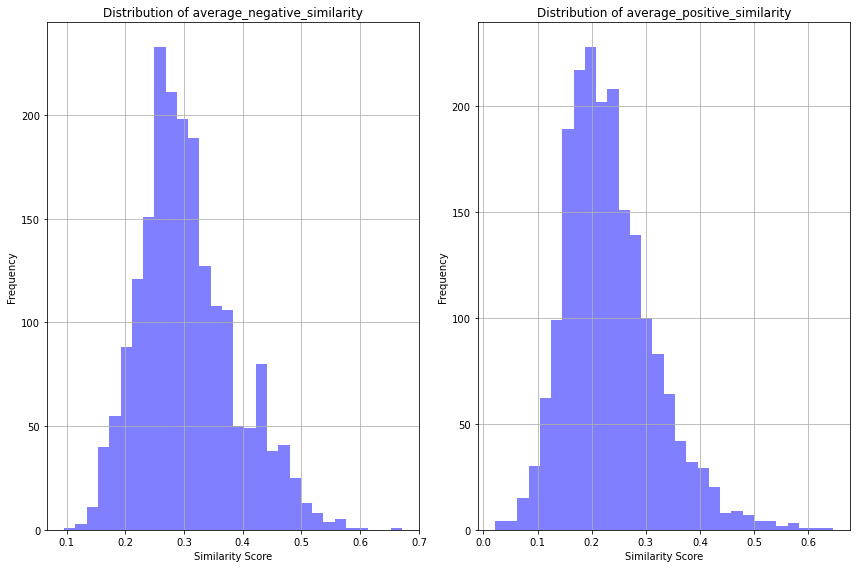

In [12]:
#To visualize the statistics above four plots are generated for the columns
#Function to create a histogram for a given category
def plot_category_histogram(category_similarities, category_name, ax):
    ax.hist(category_similarities, bins=30, alpha=0.5, color='blue')
    ax.set_xlabel('Similarity Score')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {category_name}')
    ax.grid(True)

#Defining the categories to check
categories = ['average_negative_similarity', 'average_positive_similarity']

#Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

#Plot histograms for each category
for i, ax in enumerate(axes.flatten()):
    category_similarities = gdelt_df[categories[i]].tolist()
    plot_category_histogram(category_similarities, categories[i], ax)

#Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Apply method and test similarity thresholds
-----------------------------------------
Now that the similarities have been calculated, the method has to be tested. In order to test this approach we will take the producers Nestle and Mondelez as example and append all the paragraphs of articles in a list for each of them.
Then we take all paragraphs with a similarity above 0.4 (80th percentile) and check them manually on being positive, negative or neither. This will allow the calculation of precision, recall and f1 score per similarity score and find the best one.

In [21]:
#Importing libraries needed for methodology testing
from sklearn.metrics import precision_recall_fscore_support #Performance metrics calculation
from ipywidgets import widgets #Create interactive screen for ground truth allocatino
from IPython.display import display, HTML, clear_output #Output text and hyperlink in display
import seaborn as sns #plot the results in a graph
import csv #work with csv files
from scipy import stats #Testing the sample statistics

In [13]:
#Create dataframes for two of the leveranciers
gdelt_nestle = gdelt_df[gdelt_df['producer_in_article'].apply(lambda producers: any("nestle" in producer.lower() or "nestlé" in producer.lower() for producer in producers))].reset_index(drop=True)
gdelt_mondelez = gdelt_df[gdelt_df['producer_in_article'].apply(lambda producers: any("mondelez" in producer.lower() or "mondelēz" in producer.lower() for producer in producers))].reset_index(drop=True)

#Index the dataframes again for use in function to label ground truth
gdelt_nestle.reset_index(drop=True, inplace=True)
gdelt_mondelez.reset_index(drop=True, inplace=True)

In [14]:
#Create the pool of nestle paragraphs
#Initialize an empty list to store paragraphs and their original article index
nestle_paragraphs_list = []
nestle_article_index_list = []
nestle_positive_similarities_list = []
nestle_negative_similarities_list = []

#Iterate through each article in gdelt_nestle and its corresponding index
for article_index, article_row in gdelt_nestle.iterrows():
    article_paragraphs = article_row['paragraphs']  # Assuming the column name is 'paragraphs'
    article_positive_similarities = article_row['positive_similarities_list']  # Replace with actual column name
    article_negative_similarities = article_row['negative_similarities_list']  # Replace with actual column name
    
    nestle_paragraphs_list.extend(article_paragraphs)
    nestle_article_index_list.extend([article_index] * len(article_paragraphs))
    nestle_positive_similarities_list.extend(article_positive_similarities)
    nestle_negative_similarities_list.extend(article_negative_similarities)

#Create the test DataFrame
data = {
    'article_index': nestle_article_index_list,
    'paragraph': nestle_paragraphs_list,
    'positive_similarity': nestle_positive_similarities_list,
    'negative_similarity': nestle_negative_similarities_list
}
gdelt_total_paragraphs_nestle = pd.DataFrame(data)

In [15]:
#Initialize an empty list to store paragraphs, similarities, and their original article index
mondelez_paragraphs_list = []
mondelez_article_index_list = []
mondelez_positive_similarities_list = []
mondelez_negative_similarities_list = []

#Iterate through each article in gdelt_mondelez and its corresponding index
for article_index, article_row in gdelt_mondelez.iterrows():
    article_paragraphs = article_row['paragraphs']  # Assuming the column name is 'paragraphs'
    article_positive_similarities = article_row['positive_similarities_list']
    article_negative_similarities = article_row['negative_similarities_list'] 
    
    mondelez_paragraphs_list.extend(article_paragraphs)
    mondelez_article_index_list.extend([article_index] * len(article_paragraphs))
    mondelez_positive_similarities_list.extend(article_positive_similarities)
    mondelez_negative_similarities_list.extend(article_negative_similarities)

#Create the test Dataframe
data = {
    'article_index': mondelez_article_index_list,
    'paragraph': mondelez_paragraphs_list,
    'positive_similarity': mondelez_positive_similarities_list,
    'negative_similarity': mondelez_negative_similarities_list
}
gdelt_total_paragraphs_mondelez = pd.DataFrame(data)

In [16]:
#Take the paragraphs that have a similarity higher than 75th percentile (0.36 taken as average of positive and negative percentile)
#Filter on similarity, where one of the similarities should be at least 0.36
filtered_nestle_articles = gdelt_total_paragraphs_nestle[
    (gdelt_total_paragraphs_nestle['positive_similarity'] > 0.36) |
    (gdelt_total_paragraphs_nestle['negative_similarity'] > 0.36)
]
#Update gdelt_total_paragraphs_nestle with the filtered data
gdelt_total_paragraphs_nestle = filtered_nestle_articles.copy()

#Get a random sample to test the ground truth
nestle_test_set = gdelt_total_paragraphs_nestle.sample(n=100, random_state=42)

In [17]:
#Take the paragraphs that have a similarity higher than 75th percentile (0.36 taken as average of positive and negative percentile)
filtered_mondelez_articles = gdelt_total_paragraphs_mondelez[
    (gdelt_total_paragraphs_mondelez['positive_similarity'] > 0.36) |
    (gdelt_total_paragraphs_mondelez['negative_similarity'] > 0.36)
]
#Update gdelt_total_paragraphs_mondelez with the filtered data
gdelt_total_paragraphs_mondelez = filtered_mondelez_articles.copy()

#Get a random sample to test the ground truth
mondelez_test_set = gdelt_total_paragraphs_nestle.sample(n=50, random_state=42)

### Establishing ground truth
Now the ground truth will be established for a random sample of 100 paragraphs from nestle (out of 1844) and 50 from mondelez (out of 858)
______________________________________________________________________________

In [22]:
#Establishing ground truth for the nestle articles based on the code by ipywidget (2023)
#Initialize a dictionary to store the ground truth labels for each article
ground_truth_labels_nestle = {}

#Function to display the article text and label ground truth
def label_ground_truth(index):
    paragraph_text = nestle_test_set.iloc[index]['paragraph']
    available_topics = ['positive', 'negative', 'neither']
    ground_truth = widgets.SelectMultiple(options=available_topics, value=[], description='Ground Truth:')
    
    #Display the index number of the current article
    display(HTML(f'<h3>Article Index: {index}</h3>'))
    
    #Display the article text
    display(HTML(f'<p>{paragraph_text}</p>'))
    
    #Display the multi-select widget for ground truth labeling
    display(ground_truth)
    
    #Function to save the selected labels to the dictionary
    def save_labels(btn):
        ground_truth_labels_nestle[index] = list(ground_truth.value)
    
    #Create a button to save the selected labels
    save_button = widgets.Button(description="Save Labels")
    save_button.on_click(save_labels)
    display(save_button)

#Function to handle the click event of the "Next" button
def next_article(btn):
    current_index = next_button.index
    if current_index < len(gdelt_nestle) - 1:
        next_index = current_index + 1
        next_button.index = next_index
        out.clear_output()
        #Display the next article for labelling
        with out:
            label_ground_truth(next_index)
        

#Create and initialize the index for the "Next" button
next_button = widgets.Button(description="Next")
next_button.index = 0
next_button.on_click(next_article)

# Create an output widget to display the articles
out = widgets.Output()

# Display the first article for labeling ground truth
with out:
    label_ground_truth(next_button.index)
display(out)
display(next_button)

Output()

Button(description='Next', style=ButtonStyle())

In [23]:
#We are loading the previously created csv that contains the ground truth of the sentiment and put it in a column in the test set of nestle
#Create an empty list to store the sentiment labels
sentiment_labels = []

#Read the CSV with the labels and extract the sentiment labels
with open('nestle_sentiment_truth.csv', 'r') as file:
    lines = file.readlines()
    for line in lines[1:]:  #Skip the header
        label = line.split(',')[1]  #Extract the sentiment
        sentiment = label.strip("[]'\n")  #Remove brackets, quotes, and newline
        sentiment_labels.append(sentiment)

#Add the 'ground_truth_sentiment' column to 'nestle_test_set' DataFrame
nestle_test_set['ground_truth_sentiment'] = sentiment_labels
nestle_test_set.head()

,article_index,paragraph,positive_similarity,negative_similarity,ground_truth_sentiment
3675,172,Savoy the original candy company behind Cri Cr...,0.204692,0.366993,neither
2903,117,Most of the worlds cocoa is grown by poor fami...,0.542659,0.659924,negative
2354,93,"WiseGuyReports.com adds ""Cocoa Chocolate Marke...",0.400933,0.513452,neither
3553,165,The Prince of Wales has been campaigning for a...,0.532920,0.492597,positive
3206,144,Getting buyin from the impacted countries and ...,0.478017,0.718178,neither


In [24]:
#Establishing ground truth for the mondelez articles
#Initialize a dictionary to store the ground truth labels for each article
ground_truth_labels_mondelez = {}

#Function to display the article text and label ground truth
def label_ground_truth(index):
    paragraph_text = mondelez_test_set.iloc[index]['paragraph']
    available_topics = ['positive', 'negative', 'neither']
    ground_truth = widgets.SelectMultiple(options=available_topics, value=[], description='Ground Truth:')

    #Display the index number of the current article
    display(HTML(f'<h3>Article Index: {index}</h3>'))

    #Display the paragraph text
    display(HTML(f'<p>{paragraph_text}</p>'))

    #Display the multi-select widget for ground truth labeling
    display(ground_truth)

    #Function to save the selected labels to the dictionary
    def save_labels(btn):
        ground_truth_labels_mondelez[index] = list(ground_truth.value)

    #Create a button to save the selected labels
    save_button = widgets.Button(description="Save Labels")
    save_button.on_click(save_labels)
    display(save_button)

#Function to handle the click event of the "Next" button
def next_article(btn):
    current_index = next_button.index
    if current_index < len(gdelt_mondelez) - 1:
        next_index = current_index + 1
        next_button.index = next_index
        out.clear_output()
        #Display the next article for labeling
        with out:
            label_ground_truth(next_index)

#Create and initialize the index for the "Next" button
next_button = widgets.Button(description="Next")
next_button.index = 0
next_button.on_click(next_article)

#Create an output widget to display the articles
out = widgets.Output()

#Display the first article for labeling ground truth
with out:
    label_ground_truth(next_button.index)
display(out)
display(next_button)


Output()

Button(description='Next', style=ButtonStyle())

In [25]:
#We are loading the previously created csv that contains the ground truth of the sentiment and put it in a column in the test set of mondelez
#Create an empty list to store the sentiment labels
sentiment_labels = []

#Read the CSV with the labels and extract the sentiment labels
with open('mondelez_sentiment_truth.csv', 'r') as file:
    lines = file.readlines()
    for line in lines[1:]:  #Skip the header
        label = line.split(',')[1]  #Extract the sentiment
        sentiment = label.strip("[]'\n")  #Remove brackets, quotes, and newline
        sentiment_labels.append(sentiment)

#Add the 'ground_truth_sentiment' column to 'mondelez_test_set' DataFrame
mondelez_test_set['ground_truth_sentiment'] = sentiment_labels
mondelez_test_set.head()

,article_index,paragraph,positive_similarity,negative_similarity,ground_truth_sentiment
3675,172,Savoy the original candy company behind Cri Cr...,0.204692,0.366993,neither
2903,117,Most of the worlds cocoa is grown by poor fami...,0.542659,0.659924,negative
2354,93,"WiseGuyReports.com adds ""Cocoa Chocolate Marke...",0.400933,0.513452,neither
3553,165,The Prince of Wales has been campaigning for a...,0.532920,0.492597,positive
3206,144,Getting buyin from the impacted countries and ...,0.478017,0.718178,negative


In [26]:
#Generate grount truth columns for nestle per topic
#List of possible sentiment
possible_sentiment = ['positive', 'negative', 'neither']

#Create binary columns for each sentiment for nestle
for sentiment in possible_sentiment:
    nestle_test_set[f'{sentiment}_sentiment'] = nestle_test_set['ground_truth_sentiment'].apply(lambda x: 1 if sentiment in x else 0)

#Check if binary columns are present now
nestle_test_set.head()

,article_index,paragraph,positive_similarity,negative_similarity,ground_truth_sentiment,positive_sentiment,negative_sentiment,neither_sentiment
3675,172,Savoy the original candy company behind Cri Cr...,0.204692,0.366993,neither,0,0,1
2903,117,Most of the worlds cocoa is grown by poor fami...,0.542659,0.659924,negative,0,1,0
2354,93,"WiseGuyReports.com adds ""Cocoa Chocolate Marke...",0.400933,0.513452,neither,0,0,1
3553,165,The Prince of Wales has been campaigning for a...,0.532920,0.492597,positive,1,0,0
3206,144,Getting buyin from the impacted countries and ...,0.478017,0.718178,neither,0,0,1


In [27]:
#Generate ground truth columns for mondelez per sentiment
#List of possible sentiment
possible_sentiment = ['positive', 'negative', 'neither']

#Create binary columns for each sentiment for Mondelez
for sentiment in possible_sentiment:
    mondelez_test_set[f'{sentiment}_sentiment'] = mondelez_test_set['ground_truth_sentiment'].apply(lambda x: 1 if sentiment in x else 0)

#Check if binary columns are present now
mondelez_test_set.head()

,article_index,paragraph,positive_similarity,negative_similarity,ground_truth_sentiment,positive_sentiment,negative_sentiment,neither_sentiment
3675,172,Savoy the original candy company behind Cri Cr...,0.204692,0.366993,neither,0,0,1
2903,117,Most of the worlds cocoa is grown by poor fami...,0.542659,0.659924,negative,0,1,0
2354,93,"WiseGuyReports.com adds ""Cocoa Chocolate Marke...",0.400933,0.513452,neither,0,0,1
3553,165,The Prince of Wales has been campaigning for a...,0.532920,0.492597,positive,1,0,0
3206,144,Getting buyin from the impacted countries and ...,0.478017,0.718178,negative,0,1,0


### Nestle
Now the necessary columns have been created it is possible to iterate over different similarity thresholds to find the best ones for each topic for articles containing Nestle.<br>
The following has been done:<br>
-Calculating precision, recall, and f1 score for every topic on every similarity threshold<br>
-Saving it in a dataframe<br>
-Plotting the results for nestle<br>

-----------------------------------

In [28]:
#Define the list of similarity thresholds to test
similarity_thresholds = [0.5, 0.55, 0.60, 0.65]

#List of sentiments to be looked at
sentiments = ['positive', 'negative', 'neither']

#Creating a new df for results
results_nestle = []

#Loop through similarity thresholds and sentiments
for score in similarity_thresholds:
    for sentiment in sentiments:
        y_true = nestle_test_set[f'{sentiment}_sentiment']
        
        if sentiment == 'positive':
            y_pred = nestle_test_set['positive_similarity'] >= score
        elif sentiment == 'negative':
            y_pred = nestle_test_set['negative_similarity'] >= score
        else:
            y_pred = nestle_test_set['neither_sentiment']
        
        #Calculate the metrics
        precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
        results_nestle.append({'Similarity Threshold': score, 'Sentiment': sentiment, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})

#Create a DataFrame from results
results_nestle_df = pd.DataFrame(results_nestle)

#Check the results
print(results_nestle_df)

    Similarity Threshold Sentiment  Precision    Recall  F1-Score
0                   0.50  positive   0.666667  0.413793  0.510638
1                   0.50  negative   0.312500  0.500000  0.384615
2                   0.50   neither   1.000000  1.000000  1.000000
3                   0.55  positive   0.833333  0.172414  0.285714
4                   0.55  negative   0.444444  0.400000  0.421053
5                   0.55   neither   1.000000  1.000000  1.000000
6                   0.60  positive   0.800000  0.137931  0.235294
7                   0.60  negative   0.375000  0.150000  0.214286
8                   0.60   neither   1.000000  1.000000  1.000000
9                   0.65  positive   1.000000  0.034483  0.066667
10                  0.65  negative   0.200000  0.050000  0.080000
11                  0.65   neither   1.000000  1.000000  1.000000


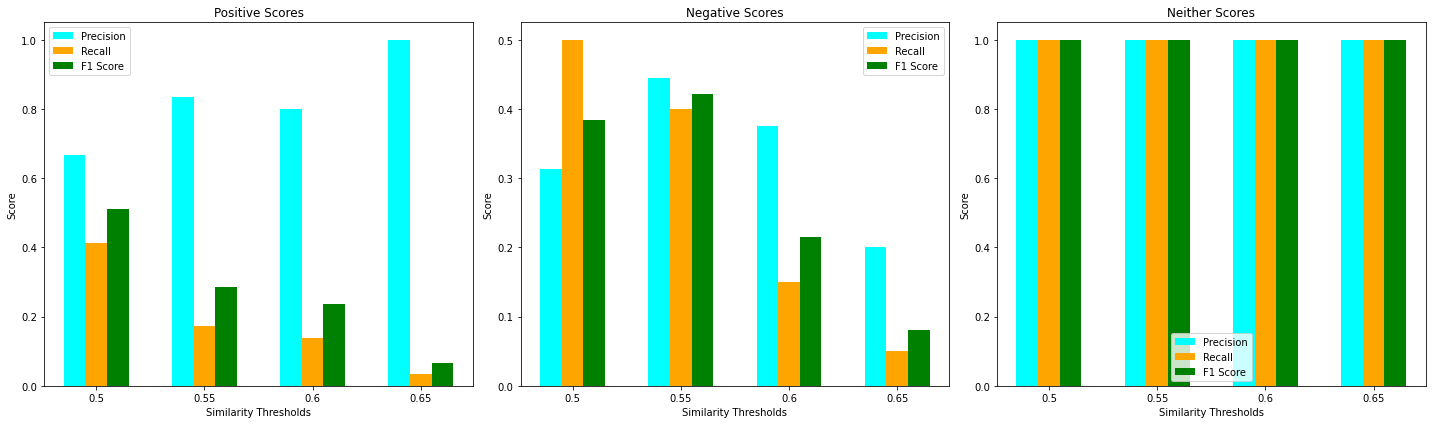

In [29]:
#Plotting the results in a graph to get a visual understanding
#List of unique sentiments
sentiments = results_nestle_df['Sentiment'].unique()

#Create a figure with subplots
fig, axes = plt.subplots(1, len(sentiments), figsize=(20, 6))

#Plot each sentiment separately in its respective subplot
for idx, sentiment in enumerate(sentiments):
    sentiment_data = results_nestle_df[results_nestle_df['Sentiment'] == sentiment]
    x = np.arange(len(sentiment_data))
    width = 0.2

    axes[idx].bar(x - width, sentiment_data['Precision'], width, label='Precision', color='cyan')
    axes[idx].bar(x, sentiment_data['Recall'], width, label='Recall', color='orange')
    axes[idx].bar(x + width, sentiment_data['F1-Score'], width, label='F1 Score', color='green')

    axes[idx].set_xlabel("Similarity Thresholds")
    axes[idx].set_ylabel("Score")
    axes[idx].set_title(f"{sentiment.capitalize()} Scores")
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(sentiment_data['Similarity Threshold'])
    axes[idx].legend()

#Plot the graphs
plt.tight_layout()
plt.show()

### Mondelez
Now the necessary columns have been created it is possible to iterate over different similarity thresholds to find the best ones for each topic for articles containing Mondelez.<br>
The following has been done:<br>
-Calculating precision, recall, and f1 score for every topic on every similarity threshold<br>
-Saving it in a dataframe<br>
-Plotting the results for Mondelez<br>
_________________________________________________

In [30]:
#Define the list of similarity thresholds to test
similarity_thresholds = [0.5, 0.55, 0.60, 0.65]

#List of sentiments to be looked at
sentiments = ['positive', 'negative', 'neither']

#Creating a new df for results
results_mondelez = []

#Loop through similarity thresholds and sentiments
for score in similarity_thresholds:
    for sentiment in sentiments:
        y_true = mondelez_test_set[f'{sentiment}_sentiment']
        
        if sentiment == 'positive':
            y_pred = mondelez_test_set['positive_similarity'] >= score
        elif sentiment == 'negative':
            y_pred = mondelez_test_set['negative_similarity'] >= score
        else:
            y_pred = mondelez_test_set['neither_sentiment']
        
        #Calculate the metrics
        precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
        results_mondelez.append({'Similarity Threshold': score, 'Sentiment': sentiment, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})

#Create a DataFrame from results
results_mondelez_df = pd.DataFrame(results_mondelez)

#Check the results
print(results_mondelez_df)

    Similarity Threshold Sentiment  Precision    Recall  F1-Score
0                   0.50  positive   0.500000  0.357143  0.416667
1                   0.50  negative   0.444444  0.727273  0.551724
2                   0.50   neither   1.000000  1.000000  1.000000
3                   0.55  positive   0.333333  0.071429  0.117647
4                   0.55  negative   0.636364  0.636364  0.636364
5                   0.55   neither   1.000000  1.000000  1.000000
6                   0.60  positive   0.500000  0.071429  0.125000
7                   0.60  negative   0.666667  0.363636  0.470588
8                   0.60   neither   1.000000  1.000000  1.000000
9                   0.65  positive   1.000000  0.071429  0.133333
10                  0.65  negative   0.750000  0.272727  0.400000
11                  0.65   neither   1.000000  1.000000  1.000000


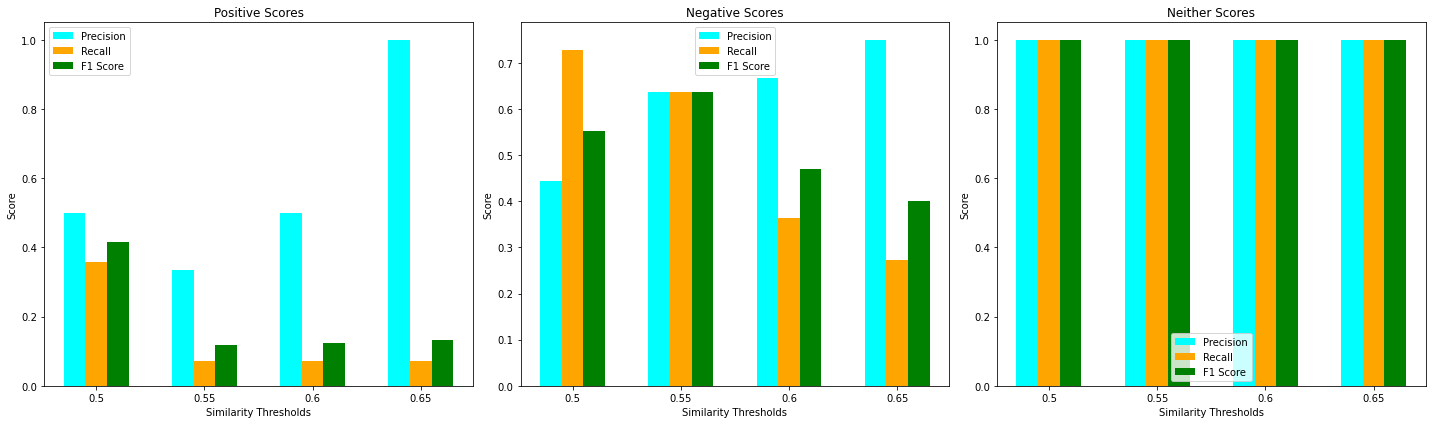

In [31]:
#Plotting the results in a graph to visualize the results
#List of unique sentiments
sentiments = results_mondelez_df['Sentiment'].unique()

#Create a figure with subplots
fig, axes = plt.subplots(1, len(sentiments), figsize=(20, 6))

#Plot each sentiment separately in its respective subplot
for idx, sentiment in enumerate(sentiments):
    sentiment_data = results_mondelez_df[results_mondelez_df['Sentiment'] == sentiment]
    x = np.arange(len(sentiment_data))
    width = 0.2

    axes[idx].bar(x - width, sentiment_data['Precision'], width, label='Precision', color='cyan')
    axes[idx].bar(x, sentiment_data['Recall'], width, label='Recall', color='orange')
    axes[idx].bar(x + width, sentiment_data['F1-Score'], width, label='F1 Score', color='green')

    axes[idx].set_xlabel("Similarity Thresholds")
    axes[idx].set_ylabel("Score")
    axes[idx].set_title(f"{sentiment.capitalize()} Scores")
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(sentiment_data['Similarity Threshold'])
    axes[idx].legend()

#Plot the graphs
plt.tight_layout()
plt.show()


### Evaluation of total
Now we check the performance if we would take the both test dataframes together for nestle and mondelez. And visualize it. 
_______________________

In [32]:
#To check the average of the data tested (both mondelez and nestle together) a new dataframe is created with all results
#Create a new dataframe for the total
total_test_df = pd.concat([nestle_test_set, mondelez_test_set], ignore_index=True)


#Define the list of similarity thresholds to test
similarity_thresholds = [0.5, 0.55, 0.60, 0.65]

#List of sentiments to be looked at
sentiments = ['positive', 'negative', 'neither']

#Creating a new df for results
results_total = []

#Loop through similarity thresholds and sentiments
for score in similarity_thresholds:
    for sentiment in sentiments:
        y_true = total_test_df[f'{sentiment}_sentiment']
        
        if sentiment == 'positive':
            y_pred = total_test_df['positive_similarity'] >= score
        elif sentiment == 'negative':
            y_pred = total_test_df['negative_similarity'] >= score
        else:
            y_pred = total_test_df['neither_sentiment']
        
        #Calculate the metrics
        precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
        results_total.append({'Similarity Threshold': score, 'Sentiment': sentiment, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})

#Create a DataFrame from results
results_total_df = pd.DataFrame(results_total)

#Check the results
print(results_total_df)

    Similarity Threshold Sentiment  Precision    Recall  F1-Score
0                   0.50  positive   0.607143  0.395349  0.478873
1                   0.50  negative   0.360000  0.580645  0.444444
2                   0.50   neither   1.000000  1.000000  1.000000
3                   0.55  positive   0.666667  0.139535  0.230769
4                   0.55  negative   0.517241  0.483871  0.500000
5                   0.55   neither   1.000000  1.000000  1.000000
6                   0.60  positive   0.714286  0.116279  0.200000
7                   0.60  negative   0.500000  0.225806  0.311111
8                   0.60   neither   1.000000  1.000000  1.000000
9                   0.65  positive   1.000000  0.046512  0.088889
10                  0.65  negative   0.444444  0.129032  0.200000
11                  0.65   neither   1.000000  1.000000  1.000000


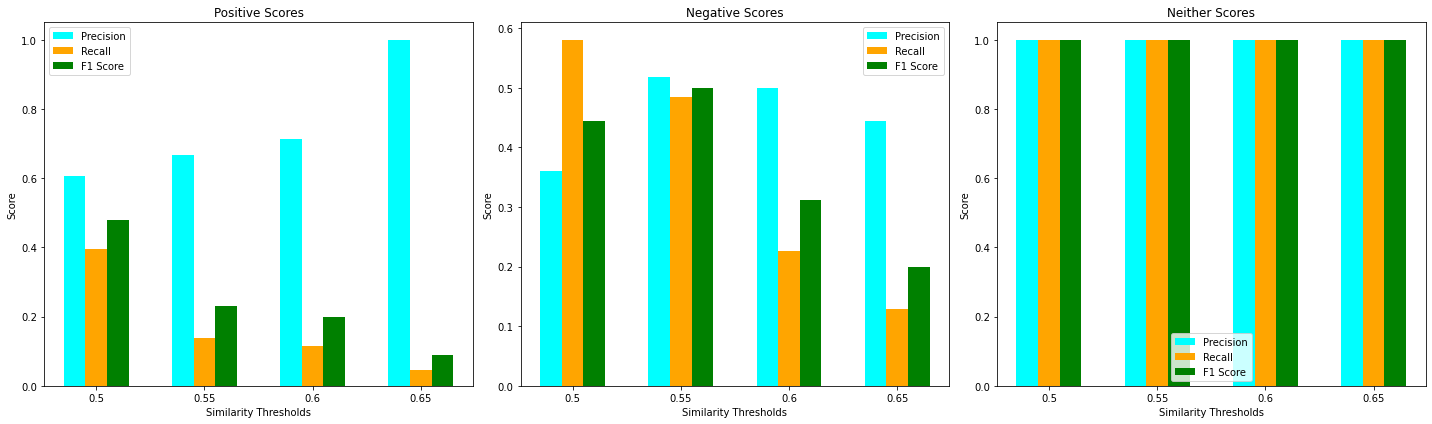

In [33]:
#Now we visualize the scores for the total test set
#List of unique sentiments
sentiments = results_total_df['Sentiment'].unique()

#Create a figure with subplots
fig, axes = plt.subplots(1, len(sentiments), figsize=(20, 6))

#Plot each sentiment separately in its respective subplot
for idx, sentiment in enumerate(sentiments):
    sentiment_data = results_total_df[results_total_df['Sentiment'] == sentiment]
    x = np.arange(len(sentiment_data))
    width = 0.2

    axes[idx].bar(x - width, sentiment_data['Precision'], width, label='Precision', color='cyan')
    axes[idx].bar(x, sentiment_data['Recall'], width, label='Recall', color='orange')
    axes[idx].bar(x + width, sentiment_data['F1-Score'], width, label='F1 Score', color='green')

    axes[idx].set_xlabel("Similarity Thresholds")
    axes[idx].set_ylabel("Score")
    axes[idx].set_title(f"{sentiment.capitalize()} Scores")
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(sentiment_data['Similarity Threshold'])
    axes[idx].legend()

#Plot the graphs
plt.tight_layout()
plt.show()

In [34]:
#Now the average is calculated per similarity threshold to get a better overview
#Create a new dataframe for the total
total_average_df = pd.concat([nestle_test_set, mondelez_test_set], ignore_index=True)

#Define the list of similarity thresholds to test
similarity_thresholds = [0.5, 0.55, 0.60, 0.65]

#Create a new df for results
results_average = []

#Loop through similarity thresholds
for score in similarity_thresholds:
    total_tp, total_fp, total_fn = 0, 0, 0
    for sentiment in ['positive', 'negative', 'neither']:
        y_true = total_average_df[f'{sentiment}_sentiment']
        
        if sentiment == 'positive':
            y_pred = total_average_df['positive_similarity'] >= score
        elif sentiment == 'negative':
            y_pred = total_average_df['negative_similarity'] >= score
        else:
            y_pred = total_average_df['neither_sentiment']
        
        tp, fp, fn, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
        total_tp += tp
        total_fp += fp
        total_fn += fn

    precision = total_tp / (total_tp + total_fp)
    recall = total_tp / (total_tp + total_fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    results_average.append({'Similarity Threshold': score, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})

#Create a DataFrame from results
results_average_df = pd.DataFrame(results_average)

#Check the results
print(results_average_df)

   Similarity Threshold  Precision    Recall  F1-Score
0                  0.50   0.498878  0.505632  0.502232
1                  0.55   0.573609  0.557877  0.565633
2                  0.60   0.622625  0.594376  0.608173
3                  0.65   0.675263  0.654762  0.664854


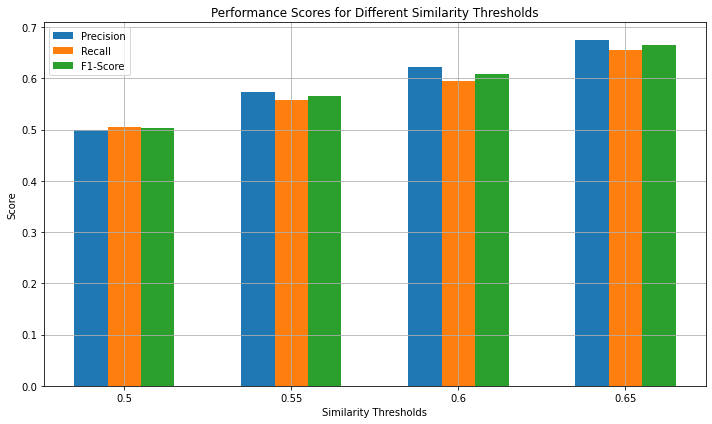

In [35]:
#Plot again but for one plot as to find the best performing similarity threshold in general
#Create a plot of the performance scores for different similarity thresholds
plt.figure(figsize=(10, 6))

#Define bar width and offset
bar_width = 0.2
offsets = np.arange(len(results_average_df['Similarity Threshold']))

#Plot grouped bars for each metric and similarity threshold
for idx, metric in enumerate(['Precision', 'Recall', 'F1-Score']):
    plt.bar(offsets + idx * bar_width, results_average_df[metric], width=bar_width, label=metric)

#Configure the x-axis and labels
plt.xlabel("Similarity Thresholds")
plt.ylabel("Score")
plt.title("Performance Scores for Different Similarity Thresholds")
plt.xticks(offsets + bar_width, results_average_df['Similarity Threshold'])
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


However, it is important to also take into account the number of articles that are included. Below is a graph with the all average similarity scores for each article and all sentiments put together. This is from a total of 1958 articles, each with two similarity scores, so a total of 3916 scores. Looking at the graph below this means that only a limited number of articles reaches the thresholds on average. 

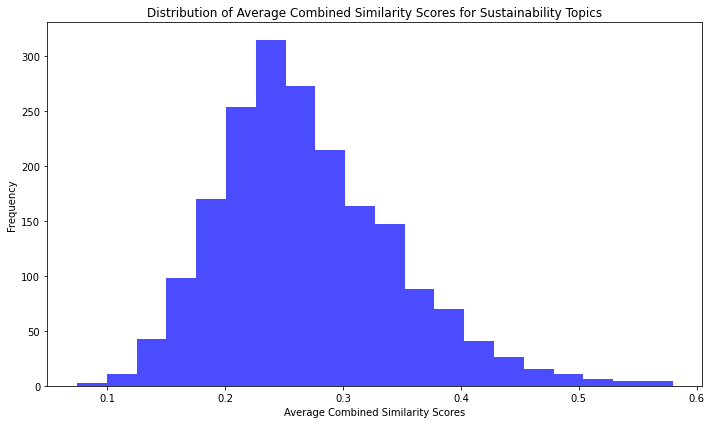

In [36]:
#Defining a plot to look at the distribution of scores, to get an insight in how threshold influence articles that could be labelled as a certain topic. 
# Create a figure
plt.figure(figsize=(10, 6))

# Calculate the average similarity scores combining both positive and negative similarities
gdelt_df['average_combined_similarity'] = (gdelt_df['average_positive_similarity'] + gdelt_df['average_negative_similarity']) / 2
average_combined_similarities = gdelt_df['average_combined_similarity'].values

# Plot the histogram
plt.hist(average_combined_similarities, bins=20, color='blue', alpha=0.7)
plt.xlabel("Average Combined Similarity Scores")
plt.ylabel("Frequency")
plt.title("Distribution of Average Combined Similarity Scores for Sustainability Topics")
plt.tight_layout()
plt.show()

To test if the sample taken was representative of the entire dataset we take the Neyman-Person approach:
- Formulating null and alternative hypthesis
H0: The sample taken for the calculation of metrics is not significantly different from the entire dataset.
HA: The sample taken for the tests does not have a
- Converting sample to test statistic
- Defining significance level
Alpha = 0.05
- Computing p-value
- Final claim

In [37]:
#Calculate the mean of the sample similarity which is not present yet
sample_mean = total_test_df[['positive_similarity', 'negative_similarity']].mean(axis=1).mean()

#Calculate the population mean based on filtered GDELT data, as the test set is filtered above the 75th percentile (>36)
gdelt_filtered_similarities = [similarity for similarity in gdelt_df['average_combined_similarity'] if similarity > 0.36]
gdelt_filtered_mean = np.mean(gdelt_filtered_similarities)

#Calculate the standard error of the sample mean
sample_std = np.std(total_test_df[['positive_similarity', 'negative_similarity']].mean(axis=1), ddof=1)
sample_size = len(total_test_df)
standard_error = sample_std / np.sqrt(sample_size)

#Calculate the t-statistic
t_statistic = (sample_mean - gdelt_filtered_mean) / standard_error

#Calculate the egrees of freedom
df = sample_size - 1

# Calculate the p-value using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=df))

# Print results
print("Sample Mean:", sample_mean)
print("Filtered GDELT Mean:", gdelt_filtered_mean)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

#Interpret the results that are calculated
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Sample mean is significantly different from population mean.")
else:
    print("Fail to reject the null hypothesis: Sample mean is not significantly different from population mean.")

Sample Mean: 0.41658771579464277
Filtered GDELT Mean: 0.41283912381579646
t-statistic: 0.4620930492949463
p-value: 0.644688606143456
Fail to reject the null hypothesis: Sample mean is not significantly different from population mean.


### Conclusion
________________

The following conclusions can be drawn:
- The sample is not significantly different from the population mean, adding significance to the tests
- The similarity measure per paragraphs has been checked, but the average is used to define sentiment of an article. This might cause slightly different outcomes.
- The metrics that have been calculated on average are affected in great deal by the results of the neither_sentiment
- When neither a positive nor a negative similarity threshold has been reached this method identified the paragraphs correctly
- The metrics for positive sentiment recognition are significantly lower than for negative sentiment recogniztion, impacting the averages 
- Possibility of reasearcher bias in manual evaluation of paragraphs

### Bibliography
1) SBERT. (n.d.). Sentence-BERT: Sentence Embeddings using Siamese BERT. SBERT. https://www.sbert.net/. Retrieved August 17, 2023.
2) IPython Project. (n.d.). Widget Basics. IPython Widgets Documentation. https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html. Retrieved August 17, 2023.
_______________

In [38]:
gdelt_df.head()

,published,text,title,url,producer_in_article,paragraphs,embeddings_paragraphs,positive_similarities_list,negative_similarities_list,average_positive_similarity,average_negative_similarity,average_combined_similarity
0,2022-03-15 05:45:00,[These ancient creatures can squeeze through t...,Progressive Charlestown,http://www.progressive-charlestown.com/search?...,[copar],[These ancient creatures can squeeze through t...,"[[-0.01725187, 0.046331406, 0.07239527, -0.001...","[0.07372238, 0.15835607, 0.29639706, 0.0144768...","[0.15826909, 0.16972905, 0.487699, 0.17295578,...",0.186022,0.260249,0.223136
4,2023-07-15 04:15:00,[The Netherlands is known for plenty of (unhea...,A brief history of Dutch chocolate,https://www.iamexpat.nl/lifestyle/lifestyle-ne...,"[droste, hosta, tony's chocolonely]",[The Netherlands is known for plenty of unheal...,"[[0.075105086, -0.025926448, 0.03910257, 0.066...","[0.3585832, 0.32700765, 0.40337887, 0.2592095,...","[0.60580754, 0.61529684, 0.45021388, 0.5704657...",0.316195,0.477867,0.397031
5,2023-02-15 03:15:00,"[Try as we might, it’s impossible to escape th...",Made in Holland Is Amazon Latest Culinary Des...,https://news.yahoo.com/made-holland-amazon-lat...,[droste],[Try as we might its impossible to escape the ...,"[[0.038175445, -0.017276494, 0.0025077933, -0....","[0.32379258, 0.20053041, 0.14371103, 0.3273357...","[0.37558678, 0.3291663, 0.31022236, 0.4432553,...",0.248275,0.314615,0.281445
6,2023-02-15 15:30:00,"[“I have three reasons to love, love, love thi...","A Valentine cake , made with a mother love - W...",https://westfaironline.com/exclusives/a-valent...,[],[I have three reasons to love love love this c...,"[[-0.070884585, 0.008030867, 0.048704583, -0.0...","[0.099942, 0.05821018, 0.36343026, 0.10294598,...","[0.27870107, 0.12385545, 0.43292648, 0.1245757...",0.154710,0.208411,0.181560
7,2022-11-15 10:30:00,[T he addition of chocolate and cocoa powder a...,Chocolate plum pudding recipe by Helen Goh,https://www.theguardian.com/food/2022/nov/28/c...,"[droste, plus]",[T he addition of chocolate and cocoa powder a...,"[[0.0688861, -0.03268212, 0.040760603, -0.0036...","[0.19709954, 0.26084977, 0.32753462, 0.0957994...","[0.3785809, 0.43211868, 0.34753898, 0.29773158...",0.162409,0.296987,0.229698


### Prepare for use in recommender system
To get the right information into the recommender system the final dataframe will be created as input. This file will be named sentiment_input_recommender_df we have the following:
- Producer
- Normalized sentiment score per producer

The final dataframe is created below after which it will be saved in a pickle file.

In [41]:
#To get the average similarity per producer, which is needed in the recommender system, we first identify the producers
unique_producers = set()
for producer_list in gdelt_df['producer_in_article']:
    unique_producers.update(producer_list)

#Create a list to hold DataFrames to be concatenated
dataframes_to_concat = []

#Calculate average similarity for each unique producer
for producer in unique_producers:
    producer_rows = gdelt_df[gdelt_df['producer_in_article'].apply(lambda x: producer in x)]

    total_normalized_similarity = 0
    total_articles = 0

    for index, row in producer_rows.iterrows():
        normalized_positive_similarity = row['positive_similarities_list'] / max(row['positive_similarities_list'])
        normalized_negative_similarity = row['negative_similarities_list'] / max(row['negative_similarities_list'])

        article_normalized_similarity = (sum(normalized_positive_similarity) - sum(normalized_negative_similarity)) / len(normalized_positive_similarity)

        total_normalized_similarity += article_normalized_similarity
        total_articles += 1

    if total_articles > 0:
        average_normalized_sentiment_score = total_normalized_similarity / total_articles
    else:
        average_normalized_sentiment_score = None

    #Append data to the list of DataFrames
    dataframes_to_concat.append(pd.DataFrame({
        'producer': [producer],
        'normalized_sentiment_score': [average_normalized_sentiment_score]
    }))

#Concatenate all DataFrames in the list into a single DataFrame
sentiment_input_recommender_df = pd.concat(dataframes_to_concat, ignore_index=True)

#Normalize sentiment scores using the provided normalization formula
a, b = 0, 1
x, y = sentiment_input_recommender_df['normalized_sentiment_score'].min(), sentiment_input_recommender_df['normalized_sentiment_score'].max()
sentiment_input_recommender_df['normalized_sentiment_score'] = (sentiment_input_recommender_df['normalized_sentiment_score'] - x) / (y - x) * (b - a) + a

#Display the resulting DataFrame
print(sentiment_input_recommender_df)

              producer  normalized_sentiment_score
0               haribo                    0.478800
1             mondelēz                    0.584095
2     lindt & sprüngli                    0.590690
3              cloetta                    1.000000
4       sweet products                    0.576090
5              ferrero                    0.539492
6                copar                    0.607901
7                 plus                    0.426974
8               pladis                    0.756196
9       lotus bakeries                    0.579415
10           hands off                    0.000000
11              nestlé                    0.550257
12              hamlet                    0.410549
13                mars                    0.580581
14               hosta                    0.565495
15            mondelez                    0.428316
16  tony's chocolonely                    0.499530
17       august storck                    1.000000
18              nestle         

In [42]:
#Define information from gdelt_df that is needed to save for input in the recommender system
pickle_file_path = r'C:\Users\ghuiskens\Thesis\News analysis\News sentiment\sentiment_input_recommender.pkl'

#Serialize the entire DataFrame using pickle
def serialize_dataframe(dataframe):
    return pickle.dumps(dataframe, protocol=pickle.HIGHEST_PROTOCOL)

serialized_df = serialize_dataframe(sentiment_input_recommender_df)

#Save the serialized DataFrame to a pickle file
with open(pickle_file_path, 'wb') as f:
    f.write(serialized_df)

print("Pickle file saved successfully.")

Pickle file saved successfully.
